In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

from scipy import stats

sys.path.append('/home/hpham/code')

# Load the config.yaml to get all the directories
from waterchange.config import read_config
from waterchange.datasets import setup_directory
config = read_config()
input_data = setup_directory(config)

Loading /home/hpham/code/waterchange/config/../config.yaml.
Config loaded successfully.
Getting sorted paths to pixel data points.
Processing folder: /home/hpham/data/geo/h016v012/TSFitLine
Folder pattern: record_change_r*.mat
Sort key: [-9, -4]
Found 2000 files
First and last directory in this folder                      
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r00001.mat                      
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r02000.mat
Processing folder: /home/hpham/data/geo/h016v012/TSFitLine_1
Folder pattern: record_change_r*.mat
Sort key: [-9, -4]
Found 3000 files
First and last directory in this folder                      
 /home/hpham/data/geo/h016v012/TSFitLine_1/record_change_r02001.mat                      
 /home/hpham/data/geo/h016v012/TSFitLine_1/record_change_r05000.mat
Found 5000 in COMBINED folder.
First and last directory in COMBINED folders                 
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r00001.mat         

In [17]:
from waterchange.utils import get_logger
from waterchange.models import predict_average_water_index_all_pixels_from_first_coefs_all_bands_regression, create_inference_map
infer_region_id = 6
train_region_id = [x for x in input_data.rois if x != infer_region_id]
logger = get_logger("Debug")
logger.info(f"Train: {train_region_id}, test: {infer_region_id}")

df_infer = predict_average_water_index_all_pixels_from_first_coefs_all_bands_regression(
    model_name="gradient_boosting",
    input_data=input_data,
    sub_dir_in_train="water_coefs_in_period",
    sub_dir_in_infer_first_all="first_coefs_all_pixels_to_df",
    sub_dir_in_infer_in_period="water_coefs_in_period",
    train_region_id=train_region_id,
    infer_region_id=infer_region_id)

Train: [0, 1, 10, 11, 12, 13], test: 6


gradient_boosting - Training error: MAE = 0.08794065554947167, R2 = 0.8864420636448275
gradient_boosting - Inference error: MAE = 0.09223757377802802, R2 = 0.7310922615412558


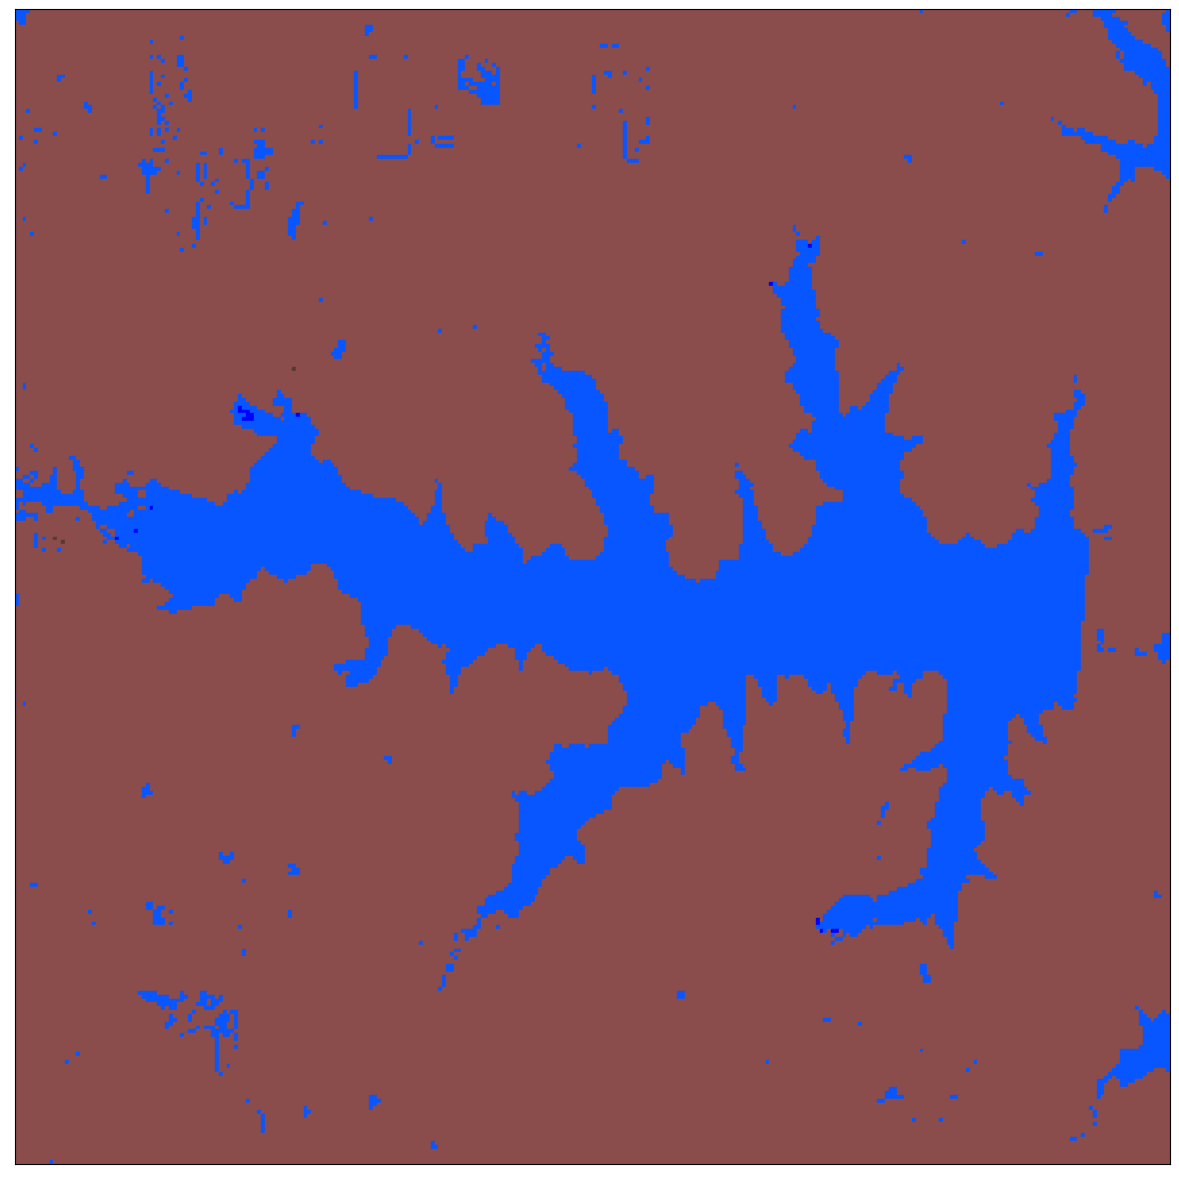

In [18]:
from waterchange.models import create_inference_map
create_inference_map(
    input_data,
    sub_dir_out="predict_index_green_white_regression",
    region_id=infer_region_id,
    inference_df=df_infer,
    # encoded_colors = {0: '#006400', 1: 'red', 2: 'blue', 3: 'green', 4: '#FF7F7F', 5: '#0856ff'},
    # encoded_colors = {0: '#70534f', 1: 'green', 2: 'blue', 3: '#8b4c4c', 4: 'white', 5: '#0856ff'},
    encoded_colors = {0: '#533b31', 1: 'blue', 3: '#8b4c4c', 4: '#0856ff', 5: 'white', 8: 'red'},
    # empty_index=3,
    empty_index=5, # Empty pixels

    )

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 50)